In [1]:
# importing pandas and numpy package for dataframe manipulations
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# importing json package to retrieve neighbourhood data from API as json file
import json

# geocoders package to get geographical coordinates
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize

# matplotlib packages to visualize data
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# importing Sci-kit package for analysis
from sklearn.cluster import KMeans

#folium package to generate visual maps with data
import folium

Scraping a webpage to obtain city and Neighbourhoods of Chicago city. This code scrapes all tabular values as seperate dataframes.

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago', header = 0)
for df in dfs:
    print(df.head())

      Neighborhood  Community area
0      Albany Park     Albany Park
1  Altgeld Gardens       Riverdale
2    Andersonville       Edgewater
3   Archer Heights  Archer Heights
4    Armour Square   Armour Square
Empty DataFrame
Columns: [Unnamed: 0, Wikimedia Commons has media related to Neighborhoods in Chicago.]
Index: []
        vte Chicago articles  \
0                   By topic   
1  Category  Commons  Portal   

                              vte Chicago articles.1  
0  Architecture Beaches Climate Colleges and univ...  
1                          Category  Commons  Portal  
  vteCommunity areas in Chicago  \
0                     Far North   
1                     Northwest   
2                         North   
3                       Central   
4                          West   

                     vteCommunity areas in Chicago.1  
0  Rogers Park West Ridge Uptown Lincoln Square E...  
1  Portage Park Irving Park Dunning Montclare Bel...  
2  North Center Lake View Lincoln Park

Assigning correct table values as chicago dataframe named **df_chicago**.

In [3]:
df_chicago = dfs[0]
df_chicago

Neighborhood           Community area
0                            Albany Park              Albany Park
1                        Altgeld Gardens                Riverdale
2                          Andersonville                Edgewater
3                         Archer Heights           Archer Heights
4                          Armour Square            Armour Square
5                                Ashburn                  Ashburn
6                        Ashburn Estates                  Ashburn
7                         Auburn Gresham           Auburn Gresham
8                            Avalon Park              Avalon Park
9                               Avondale                 Avondale
10                      Avondale Gardens              Irving Park
11                     Back of the Yards                 New City
12                       Belmont Central           Belmont Cragin
13                       Belmont Gardens                  Hermosa
14                       Belmont Heights                  Dunning
15                       Belmont Terrace                  Dunning
16                               Beverly                  Beverly
17                          Beverly View                  Ashburn
18                         Beverly Woods              Morgan Park
19                              Big Oaks             Norwood Park
20                              Boystown                Lake View
21                           Bowmanville           Lincoln Square
22                              Brainerd       Washington Heights
23                             Brickyard           Belmont Cragin
24                            Bridgeport               Bridgeport
25                         Brighton Park            Brighton Park
26                           Bronzeville                  Douglas
27                              Bucktown             Logan Square
28                         Budlong Woods           Lincoln Square
29                            Buena Park                   Uptown
30                              Burnside                 Burnside
31                         Cabrini–Green          Near North Side
32                       Calumet Heights          Calumet Heights
33                           Canaryville                 New City
34                       Central Station          Near South Side
35                               Chatham                  Chatham
36                          Chicago Lawn             Chicago Lawn
37                             Chinatown            Armour Square
38                      Chrysler Village                 Clearing
39                        Clarendon Park                   Uptown
40                         Clearing East                 Clearing
41                         Clearing West                 Clearing
42                 Cottage Grove Heights                  Pullman
43                                Cragin           Belmont Cragin
44                             Crestline                  Ashburn
45                        Dearborn Homes                  Douglas
46                         Dearborn Park          Near South Side
47                          Douglas Park           North Lawndale
48                               Dunning                  Dunning
49                          East Beverly                  Beverly
50                          East Chatham                  Chatham
51                    East Garfield Park       East Garfield Park
52                        East Hyde Park                Hyde Park
53                           East Pilsen          Lower West Side
54                             East Side                East Side
55                          East Village                West Town
56                            Eden Green                Riverdale
57                             Edgebrook              Forest Glen
58                             Edgewater                Edgewater
59                       Edgewater Beach                Edgewater
60

In [4]:
chicago_process = df_chicago
chicago_process.head()

Neighborhood  Community area
0      Albany Park     Albany Park
1  Altgeld Gardens       Riverdale
2    Andersonville       Edgewater
3   Archer Heights  Archer Heights
4    Armour Square   Armour Square

In [5]:
chicago_process = chicago_process[['Community area','Neighborhood']]
chicago_process.head()

Community area     Neighborhood
0     Albany Park      Albany Park
1       Riverdale  Altgeld Gardens
2       Edgewater    Andersonville
3  Archer Heights   Archer Heights
4   Armour Square    Armour Square

Renaming columns as **Borough** and **Neighbourhood**.

In [6]:
chicago_process.rename(columns={'Community area':'Borough','Neighborhood':'Neighbourhood'}, inplace = True)

In [7]:
chicago_process.head()

Borough    Neighbourhood
0     Albany Park      Albany Park
1       Riverdale  Altgeld Gardens
2       Edgewater    Andersonville
3  Archer Heights   Archer Heights
4   Armour Square    Armour Square

Use **groupby()** method to group _Neighbourhood_ values by unique values of _Borough_.

In [8]:
chicago_process = chicago_process.groupby(['Borough'])['Neighbourhood'].apply(','.join).reset_index()
chicago_process.head()

Borough                                      Neighbourhood
0     Albany Park  Albany Park,Mayfair,North Mayfair,Ravenswood M...
1  Archer Heights                                     Archer Heights
2   Armour Square          Armour Square,Chinatown,Wentworth Gardens
3         Ashburn  Ashburn,Ashburn Estates,Beverly View,Crestline...
4  Auburn Gresham                             Auburn Gresham,Gresham

In [9]:
chicago_process['Borough'] = chicago_process['Borough'].str.upper()
chicago_process.head()

Borough                                      Neighbourhood
0     ALBANY PARK  Albany Park,Mayfair,North Mayfair,Ravenswood M...
1  ARCHER HEIGHTS                                     Archer Heights
2   ARMOUR SQUARE          Armour Square,Chinatown,Wentworth Gardens
3         ASHBURN  Ashburn,Ashburn Estates,Beverly View,Crestline...
4  AUBURN GRESHAM                             Auburn Gresham,Gresham

In [10]:
#import geocoder # import geocoder

# initialize your variable to None
#lat_lng_coords = None

# loop until you get the coordinates
#while(lat_lng_coords is None):
 # g = geocoder.google('{}, Chicago, Illinois'.format(Borough))
 # lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

In [11]:
pip install geocoder

    100% |████████████████████████████████| 102kB 11.3MB/s 
Note: you may need to restart the kernel to use updated packages.


In [12]:
import geocoder
g = geocoder.google(60623)
print(g.latlng)

None


Reading csv file data into pandas dataframe.

In [13]:
chicago_coordinate = pd.read_csv('chicago_coordinate1 - Sheet1.csv')
chicago_coordinate.head()

Borough  Latitude  Longitude
0     ALBANY PARK   41.9683   -87.7280
1  ARCHER HEIGHTS   41.8079   -87.7236
2   ARMOUR SQUARE   41.8408   -87.6340
3         ASHBURN   41.7479   -87.7072
4  AUBURN GRESHAM   41.7434   -87.6562

Merging two dataframes to obtain latitude and longitude values of each Borough using **merge()** method

In [14]:
chicago_data = chicago_process.merge(chicago_coordinate, on ='Borough', how = 'left')
chicago_data.head()

Borough                                      Neighbourhood  \
0     ALBANY PARK  Albany Park,Mayfair,North Mayfair,Ravenswood M...   
1  ARCHER HEIGHTS                                     Archer Heights   
2   ARMOUR SQUARE          Armour Square,Chinatown,Wentworth Gardens   
3         ASHBURN  Ashburn,Ashburn Estates,Beverly View,Crestline...   
4  AUBURN GRESHAM                             Auburn Gresham,Gresham   

   Latitude  Longitude  
0   41.9683   -87.7280  
1   41.8079   -87.7236  
2   41.8408   -87.6340  
3   41.7479   -87.7072  
4   41.7434   -87.6562

In [15]:
value = chicago_data[chicago_data['Borough']=='SOUTH DEERING'].index
chicago_data.drop(value, inplace = True)

In [16]:
print(chicago_data.shape)
chicago_data.dtypes

(81, 4)


Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

Scraping the wikipedia page to obtain all tables as dataframes.

In [17]:
dfs1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
for df1 in dfs1:
    print(df1.head())

  Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront
                                          Unnamed: 0  \
0  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...   
1                                                 NL   
2                                                  A   

                               Canadian postal codes  \
0  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...   
1                                                 NS   
2                                                  B   

                                          Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...        NaN        NaN   
1                                                 PE         NB         QC   
2                                 

Assigning appropriate dataframe as *canada_city* for further processing.

In [18]:
canada_city = dfs1[0]
canada_city.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

Dropping all rows that has value "Not assigned" in Borough column.

In [19]:
df_process = canada_city
df_process.head()
value = df_process[df_process['Borough']=='Not assigned'].index
df_process.drop(value, inplace = True)
df_process.head()

Postcode           Borough     Neighbourhood
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront
5      M5A  Downtown Toronto       Regent Park
6      M6A        North York  Lawrence Heights

Identify rows that has value "Not assigned" in Neighbourhood column

In [20]:
df_process.loc[df_process['Neighbourhood'] == 'Not assigned']

Postcode       Borough Neighbourhood
8      M7A  Queen's Park  Not assigned

Replace "Not assigned" in Neighbourhood column with value in Borough column.

In [21]:
df_process['Neighbourhood'].replace('Not assigned',"Queen's Park", inplace = True)

In [22]:
df_process.head(10)

Postcode           Borough     Neighbourhood
2       M3A        North York         Parkwoods
3       M4A        North York  Victoria Village
4       M5A  Downtown Toronto      Harbourfront
5       M5A  Downtown Toronto       Regent Park
6       M6A        North York  Lawrence Heights
7       M6A        North York    Lawrence Manor
8       M7A      Queen's Park      Queen's Park
10      M9A         Etobicoke  Islington Avenue
11      M1B       Scarborough             Rouge
12      M1B       Scarborough           Malvern

Grouping Neighbourhoods by unique Postcode value

In [23]:
df_process = df_process.groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
df_process

Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
16       M1X       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
20       M2L        North York   
21       M2M        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
30       M3K        North York   
31       M3L        North York   
32       M3M        North York   
33       M3N        North York   
34       M4A        North York   
35       M4B         East York   
36       M4C         East York   
37       M4E      East Toronto   
38       M4G         East York   
39       M4H         East York   
40       M4J         East York   
41       M4K      East Toronto   
42       M4L      East Toronto   
43       M4M      East Toronto   
44       M4N   Central Toronto   
45       M4P   Central Toronto   
46       M4R   Central Toronto   
47       M4S   Central Toronto   
48       M4T   Central Toronto   
49       M4V   Central Toronto   
50       M4W  Downtown Toronto   
51       M4X  Downtown Toronto   
52       M4Y  Downtown Toronto   
53       M5A  Downtown Toronto   
54       M5B  Downtown Toronto   
55       M5C  Downtown Toronto   
56       M5E  Downtown Toronto   
57       M5G  Downtown Toronto   
58       M5H  Downtown Toronto   
59       M5J  Downtown Toronto   
60       M5K  Downtown Toronto   
61       M5L  Downtown Toronto   
62       M5M        North York   
63       M5N   Central Toronto   
64       M5P   Central Toronto   
65       M5R   Central Toronto   
66       M5S  Downtown Toronto   
67       M5T  Downtown Toronto   
68       M5V  Downtown Toronto   
69       M5W  Downtown Toronto   
70       M5X  Downtown Toronto   
71       M6A        North York   
72       M6B        North York   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
93       M9A         Etobicoke   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
98       M9N              York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood  
0                                        Rouge,Malvern  
1                 Highland Creek,Rouge Hill,Port Union  
2                      Guildwood,Morningside,West Hill  
3                                               Woburn  
4                                            Cedarbrae  
5                                  Scarborough Village  
6            East Birchmount Park,Ionview,Kennedy Park  
7          

Reading csv file as pandas dataframe

In [24]:
df_coordinates = pd.read_csv("http://cocl.us/Geospatial_data")
df_coordinates

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

Merge df_process and df_coordinates on Postcode to obtain latitude and longitude values.

In [25]:
df_merge = pd.merge(df_process, df_coordinates, left_on = 'Postcode', right_on = 'Postal Code')
df_merge.head(15)

Postcode      Borough                                      Neighbourhood  \
0       M1B  Scarborough                                      Rouge,Malvern   
1       M1C  Scarborough               Highland Creek,Rouge Hill,Port Union   
2       M1E  Scarborough                    Guildwood,Morningside,West Hill   
3       M1G  Scarborough                                             Woburn   
4       M1H  Scarborough                                          Cedarbrae   
5       M1J  Scarborough                                Scarborough Village   
6       M1K  Scarborough          East Birchmount Park,Ionview,Kennedy Park   
7       M1L  Scarborough                      Clairlea,Golden Mile,Oakridge   
8       M1M  Scarborough      Cliffcrest,Cliffside,Scarborough Village West   
9       M1N  Scarborough                         Birch Cliff,Cliffside West   
10      M1P  Scarborough  Dorset Park,Scarborough Town Centre,Wexford He...   
11      M1R  Scarborough                                   Maryvale,Wexford   
12      M1S  Scarborough                                          Agincourt   
13      M1T  Scarborough              Clarks Corners,Sullivan,Tam O'Shanter   
14      M1V  Scarborough  Agincourt North,L'Amoreaux East,Milliken,Steel...   

   Postal Code   Latitude  Longitude  
0          M1B  43.806686 -79.194353  
1          M1C  43.784535 -79.160497  
2          M1E  43.763573 -79.188711  
3          M1G  43.770992 -79.216917  
4          M1H  43.773136 -79.239476  
5          M1J  43.744734 -79.239476  
6          M1K  43.727929 -79.262029  
7          M1L  43.711112 -79.284577  
8          M1M  43.716316 -79.239476  
9          M1N  43.692657 -79.264848  
10         M1P  43.757410 -79.273304  
11         M1R  43.750072 -79.295849  
12         M1S  43.794200 -79.262029  
13         M1T  43.781638 -79.304302  
14         M1V  43.815252 -79.284577

In [26]:
df_merge = df_merge.drop('Postal Code', axis = 1)
df_merge.head()

Postcode      Borough                         Neighbourhood   Latitude  \
0      M1B  Scarborough                         Rouge,Malvern  43.806686   
1      M1C  Scarborough  Highland Creek,Rouge Hill,Port Union  43.784535   
2      M1E  Scarborough       Guildwood,Morningside,West Hill  43.763573   
3      M1G  Scarborough                                Woburn  43.770992   
4      M1H  Scarborough                             Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [27]:
canada_data = df_merge
canada_data

Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
16       M1X       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
20       M2L        North York   
21       M2M        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
30       M3K        North York   
31       M3L        North York   
32       M3M        North York   
33       M3N        North York   
34       M4A        North York   
35       M4B         East York   
36       M4C         East York   
37       M4E      East Toronto   
38       M4G         East York   
39       M4H         East York   
40       M4J         East York   
41       M4K      East Toronto   
42       M4L      East Toronto   
43       M4M      East Toronto   
44       M4N   Central Toronto   
45       M4P   Central Toronto   
46       M4R   Central Toronto   
47       M4S   Central Toronto   
48       M4T   Central Toronto   
49       M4V   Central Toronto   
50       M4W  Downtown Toronto   
51       M4X  Downtown Toronto   
52       M4Y  Downtown Toronto   
53       M5A  Downtown Toronto   
54       M5B  Downtown Toronto   
55       M5C  Downtown Toronto   
56       M5E  Downtown Toronto   
57       M5G  Downtown Toronto   
58       M5H  Downtown Toronto   
59       M5J  Downtown Toronto   
60       M5K  Downtown Toronto   
61       M5L  Downtown Toronto   
62       M5M        North York   
63       M5N   Central Toronto   
64       M5P   Central Toronto   
65       M5R   Central Toronto   
66       M5S  Downtown Toronto   
67       M5T  Downtown Toronto   
68       M5V  Downtown Toronto   
69       M5W  Downtown Toronto   
70       M5X  Downtown Toronto   
71       M6A        North York   
72       M6B        North York   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
93       M9A         Etobicoke   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
98       M9N              York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                        Rouge,Malvern  43.806686 -79.194353  
1                 Highland Creek,Rouge Hill,Port Union  43.784535 -79.160497  
2                      Guildwood,Morningside,West Hill  43.763573 -79.188711  
3                                               Woburn  43.770992 -79.216917  
4                                            Cedarbrae  43.773136 -79.23

In [28]:
canada_data.dtypes

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

In [93]:
value = canada_data[canada_data['Postcode']=='M1X'].index
canada_data.drop(value, inplace = True)

value = canada_data[canada_data['Postcode']=='M2L'].index
canada_data.drop(value, inplace = True)

value = canada_data[canada_data['Postcode']=='M9A'].index
canada_data.drop(value, inplace = True)

value = canada_data[canada_data['Postcode']=='M2M'].index
canada_data.drop(value, inplace = True)

value = canada_data[canada_data['Postcode']=='M9N'].index
canada_data.drop(value, inplace = True)
canada_data.shape

(98, 5)

Use geocoder to obtain latitude and longitude coordinates of Chicago,USA

In [30]:
Address = 'Chicago, USA'

geolocator = Nominatim(user_agent="Chicago_explorer")
location = geolocator.geocode(Address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


Generating chicago neighbourhood map using **Folium** package

In [31]:
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(chicago_data['Latitude'], chicago_data['Longitude'], chicago_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

Use **Foursquare API** to explore and segment neighbourhoods of **_Chicago_**

In [32]:
CLIENT_ID = '3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5'
CLIENT_SECRET = 'QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5
CLIENT_SECRET:QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H


Lets explore first neighbourhood alone now. 

In [33]:
chicago_data.loc[0,'Neighbourhood']

'Albany Park,Mayfair,North Mayfair,Ravenswood Manor'

In [34]:
n_latitude = chicago_data.loc[0, 'Latitude']
n_longitude = chicago_data.loc[0, 'Longitude']

n_name = chicago_data.loc[0, 'Neighbourhood']

print('Latitude and longitude values of {} are {}, {}.'.format(n_name, 
                                                               n_latitude, 
                                                               n_longitude))

Latitude and longitude values of Albany Park,Mayfair,North Mayfair,Ravenswood Manor are 41.9683, -87.728.


Using Foursquare get 100 venues within 750 meters radius from first neighbourhood. Creating url first

In [35]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
       CLIENT_ID, CLIENT_SECRET, VERSION, n_latitude, n_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5&client_secret=QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H&v=20180605&ll=41.9683,-87.728&radius=750&limit=100'

Using Requests library to get neighbourhood's venues as json file.

In [36]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5cf5a7aef594df57eb60c704'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Albany Park',
  'headerFullLocation': 'Albany Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 41.97505000675, 'lng': -87.71893844182136},
   'sw': {'lat': 41.961549993249996, 'lng': -87.73706155817862}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5afeaaf964a520e7dd28e3',
       'name': 'Starbucks',
       'location': {'address': '4830 N Pulaski Rd',
        'lat': 41.96891084604478,
        'lng': -87.72881662266137,
        'labeledLatLngs': [{'label':

Defining a function **get_category_type()** to extract category name of the venue

In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Use get_category_type() function to extract category, name, latitude and longitude values of nearby venues.

In [38]:
venues = result['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat  \
0                                  Starbucks         Coffee Shop  41.968911   
1                       Lawrence Fish Market  Seafood Restaurant  41.968280   
2                    Marie's Pizza & Liquors         Pizza Place  41.968132   
3  Ssyal Korean Restaurant and Ginseng House   Korean Restaurant  41.968172   
4                   Chicago Kalbi Korean BBQ   Korean Restaurant  41.968314   

         lng  
0 -87.728817  
1 -87.726250  
2 -87.731533  
3 -87.733207  
4 -87.722771

Printing number of venues returned by Foursquare API.

In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


Now again write a function **getNearbyVenues()** to extract nearby venues for each neighbourhood and create a new dataframe.

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        result = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in result])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
chicago_venues = getNearbyVenues(names=chicago_data['Neighbourhood'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude']
                                  )

Albany Park,Mayfair,North Mayfair,Ravenswood Manor
Archer Heights
Armour Square,Chinatown,Wentworth Gardens
Ashburn,Ashburn Estates,Beverly View,Crestline,Parkview,Scottsdale,Wrightwood
Auburn Gresham,Gresham
Galewood,The Island,North Austin,South Austin
West Humboldt Park
Avalon Park,Marynook,Stony Island Park
Avondale,Jackowo,Wacławowo
Polish Village
Belmont Central,Brickyard,Cragin,Hanson Park
Beverly,East Beverly,West Beverly
Bridgeport
Brighton Park
Burnside
Calumet Heights,Pill Hill
Chatham,East Chatham,West Chatham
West Chesterfield
Chicago Lawn,Lithuanian Plaza,Marquette Park
Chrysler Village,Clearing East,Clearing West
Bronzeville,Dearborn Homes,The Gap,Groveland Park,Lake Meadows,Prairie Shores,South Commons,Stateway Gardens
Belmont Heights,Belmont Terrace,Dunning,Irving Woods,Schorsch Village
East Garfield Park,Fifth City
East Side
Andersonville,Edgewater,Edgewater Beach,Edgewater Glen,Lakewood / Balmoral
Edison Park
Englewood,Hamilton Park
Edgebrook,Forest Glen,Old Edgebroo

Using getNearbyVenues() function to extract nearby venues of all neighbourhoods and adding them as a dataframe.

In [42]:
print(chicago_venues.shape)
chicago_venues.head()

(1698, 7)


Neighbourhood  Neighbourhood Latitude  \
0  Albany Park,Mayfair,North Mayfair,Ravenswood M...                 41.9683   
1  Albany Park,Mayfair,North Mayfair,Ravenswood M...                 41.9683   
2  Albany Park,Mayfair,North Mayfair,Ravenswood M...                 41.9683   
3  Albany Park,Mayfair,North Mayfair,Ravenswood M...                 41.9683   
4  Albany Park,Mayfair,North Mayfair,Ravenswood M...                 41.9683   

   Neighbourhood Longitude                                      Venue  \
0                  -87.728                                  Starbucks   
1                  -87.728                       Lawrence Fish Market   
2                  -87.728                    Marie's Pizza & Liquors   
3                  -87.728  Ssyal Korean Restaurant and Ginseng House   
4                  -87.728                                Dollar Tree   

   Venue Latitude  Venue Longitude      Venue Category  
0       41.968911       -87.728817         Coffee Shop  
1       41.968280       -87.726250  Seafood Restaurant  
2       41.968132       -87.731533         Pizza Place  
3       41.968172       -87.733207   Korean Restaurant  
4       41.970530       -87.728195      Discount Store

Checking how many venues have been returned for each neighbourhood

In [43]:
chicago_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Albany Park,Mayfair,North Mayfair,Ravenswood Manor                      33   
Altgeld Gardens,Eden Green,Golden Gate,Riverdale                         1   
Andersonville,Edgewater,Edgewater Beach,Edgewat...                      44   
Archer Heights                                                          24   
Armour Square,Chinatown,Wentworth Gardens                               13   
Ashburn,Ashburn Estates,Beverly View,Crestline,...                      12   
Auburn Gresham,Gresham                                                   4   
Avalon Park,Marynook,Stony Island Park                                  11   
Avondale Gardens,Irving Park,Kilbourn Park,Merc...                      23   
Avondale,Jackowo,Wacławowo                                              37   
Back of the Yards,Canaryville,New City                                  26   
Belmont Central,Brickyard,Cragin,Hanson Park                            27   
Belmont Gardens,Hermosa,Kelvyn Park                                     12   
Belmont Heights,Belmont Terrace,Dunning,Irving ...                      20   
Beverly Woods,Kennedy Park,Morgan Park,West Mor...                       4   
Beverly,East Beverly,West Beverly                                       19   
Big Oaks,Norwood Park East,Norwood Park West,Ol...                       3   
Bowmanville,Budlong Woods,Lincoln Square,Ravens...                      60   
Boystown,Graceland West,Lake View,Lake View Eas...                      30   
Brainerd,Longwood Manor,Washington Heights                              16   
Bridgeport                                                              43   
Brighton Park                                                           16   
Bronzeville,Dearborn Homes,The Gap,Groveland Pa...                      37   
Bucktown,Kosciuszko Park,Logan Square,Palmer Sq...                      24   
Buena Park,Clarendon Park,Margate Park,New Chin...                      46   
Burnside                                                                 5   
Cabrini–Green,Gold Coast,Goose Island,Magnifice...                      78   
Calumet Heights,Pill Hill                                                2   
Central Station,Dearborn Park,Museum Campus,Pra...                      34   
Chatham,East Chatham,West Chatham                                       10   
Chicago Lawn,Lithuanian Plaza,Marquette Park                             4   
Chrysler Village,Clearing East,Clearing West                            17   
Cottage Grove Heights,Pullman                                            8   
Douglas Park,Homan Square,K-Town,North Lawndale                          4   
East Garfield Park,Fifth City                                            8   
East Hyde Park,Hyde Park                                                43   
East Pilsen,Heart of Chicago,Lower West Side,Pi...                      16   
East Side                                                                8   
East Village,Noble Square,Pulaski Park,River We...                      52   
Edgebrook,Forest Glen,Old Edgebrook,Sauganash,S...                      23   
Edison Park                                                             26   
Englewood,Hamilton Park                                                  6   
Fernwood,Kensington,Lilydale,Princeton Park,Ros...                       5   
Ford City,West Lawn                                                     16   
Fuller Park                                                             12   
Fulton River District,Greektown,Illinois Medica...                      43   
Gage Park                                                                9   
Galewood,The Island,North Austin,South Austin                           11   
Garfield Ridge,LeClaire Courts,Sleepy Hollow,Vi...                      18   
Gladstone Park,Jefferson Park                                           12

Using one hot encoding to analyze each neighbourhood

In [44]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighbourhood'] = chicago_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

Neighbourhood  ATM  Accessories Store  \
0  Albany Park,Mayfair,North Mayfair,Ravenswood M...    0                  0   
1  Albany Park,Mayfair,North Mayfair,Ravenswood M...    0                  0   
2  Albany Park,Mayfair,North Mayfair,Ravenswood M...    0                  0   
3  Albany Park,Mayfair,North Mayfair,Ravenswood M...    0                  0   
4  Albany Park,Mayfair,North Mayfair,Ravenswood M...    0                  0   

   Adult Boutique  African Restaurant  American Restaurant  Antique Shop  \
0               0                   0                    0             0   
1               0                   0                    0             0   
2               0                   0                    0             0   
3               0                   0                    0             0   
4               0                   0                    0             0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Automotive Shop  \
0                 0                   0           0                0   
1                 0                   0           0                0   
2                 0                   0           0                0   
3                 0                   0           0                0   
4                 0                   0           0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Beach  Bed & Breakfast  Beer Garden  Beer Store  Big Box Store  \
0      0                0            0           0              0   
1      0                0            0           0              0   
2      0                0            0           0              0   
3      0                0            0           0              0   
4      0                0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Bowling Alley  Breakfast Spot  Brewery  \
0          0         0              0               0        0   
1          0         0              0               0        0   
2          0         0              0               0        0   
3          0         0              0               0        0   
4          0         0              0               0        0   

   Bubble Tea Shop  Burger Joint  Burrito Place  Bus Station  Bus Stop  \
0                0             0              0            0         0   
1                0             0              0            0         0   
2                0             0              0            0         0   
3                0             0              0            0         0   
4                0             0              0            0         0   

In [45]:
chicago_onehot.shape

(1698, 246)

Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [46]:
chicago_grouped = chicago_onehot.groupby('Neighbourhood').mean().reset_index()
chicago_grouped

Neighbourhood       ATM  \
0   Albany Park,Mayfair,North Mayfair,Ravenswood M...  0.000000   
1    Altgeld Gardens,Eden Green,Golden Gate,Riverdale  0.000000   
2   Andersonville,Edgewater,Edgewater Beach,Edgewa...  0.000000   
3                                      Archer Heights  0.000000   
4           Armour Square,Chinatown,Wentworth Gardens  0.000000   
5   Ashburn,Ashburn Estates,Beverly View,Crestline...  0.000000   
6                              Auburn Gresham,Gresham  0.000000   
7              Avalon Park,Marynook,Stony Island Park  0.000000   
8   Avondale Gardens,Irving Park,Kilbourn Park,Mer...  0.000000   
9                          Avondale,Jackowo,Wacławowo  0.000000   
10             Back of the Yards,Canaryville,New City  0.000000   
11       Belmont Central,Brickyard,Cragin,Hanson Park  0.000000   
12                Belmont Gardens,Hermosa,Kelvyn Park  0.000000   
13  Belmont Heights,Belmont Terrace,Dunning,Irving...  0.000000   
14  Beverly Woods,Kennedy Park,Morgan Park,West Mo...  0.000000   
15                  Beverly,East Beverly,West Beverly  0.000000   
16  Big Oaks,Norwood Park East,Norwood Park West,O...  0.000000   
17  Bowmanville,Budlong Woods,Lincoln Square,Raven...  0.000000   
18  Boystown,Graceland West,Lake View,Lake View Ea...  0.000000   
19         Brainerd,Longwood Manor,Washington Heights  0.000000   
20                                         Bridgeport  0.000000   
21                                      Brighton Park  0.000000   
22  Bronzeville,Dearborn Homes,The Gap,Groveland P...  0.000000   
23  Bucktown,Kosciuszko Park,Logan Square,Palmer S...  0.000000   
24  Buena Park,Clarendon Park,Margate Park,New Chi...  0.000000   
25                                           Burnside  0.000000   
26  Cabrini–Green,Gold Coast,Goose Island,Magnific...  0.000000   
27                          Calumet Heights,Pill Hill  0.000000   
28  Central Station,Dearborn Park,Museum Campus,Pr...  0.000000   
29                  Chatham,East Chatham,West Chatham  0.000000   
30       Chicago Lawn,Lithuanian Plaza,Marquette Park  0.000000   
31       Chrysler Village,Clearing East,Clearing West  0.000000   
32                      Cottage Grove Heights,Pullman  0.000000   
33    Douglas Park,Homan Square,K-Town,North Lawndale  0.000000   
34                      East Garfield Park,Fifth City  0.000000   
35                           East Hyde Park,Hyde Park  0.000000   
36  East Pilsen,Heart of Chicago,Lower West Side,P...  0.000000   
37                                          East Side  0.000000   
38  East Village,Noble Square,Pulaski Park,River W...  0.019231   
39  Edgebrook,Forest Glen,Old Edgebrook,Sauganash,...  0.000000   
40                                        Edison Park  0.000000   
41                            Englewood,Hamilton Park  0.000000   
42  Fernwood,Kensington,Lilydale,Princeton Park,Ro...  0.000000   
43                                Ford City,West Lawn  0.000000   
44                                        Fuller Park  0.000000   
45  Fulton River District,Greektown,Illinois Medic...  0.000000   
46                                          Gage Park  0.000000   
47      Galewood,The Island,North Austin,South Austin  0.000000   
48  Garfield Ridge,LeClaire Courts,Sleepy Hollow,V...  0.000000   
49                      Gladstone Park,Jefferson Park  0.000000   
50  Grand Boulevard,Legends South (Robert Taylor H...  0.000000   
51   Grand Crossing,Greater Grand Crossing,Park Manor  0.000000   
52                                          Hegewisch  0.000000   
53             Hollywood Park,North Park,River's Edge  0.000000   
54                                      Humboldt Park  0.000000   
55                 Jackson Park Highlands,South Shore  0.000000   
56                              Kenwood,North Kenwood  0.000000   
57  Lincoln Park,Old Town Triangle,Park West,Ranch...  0.000000   
58      Little Village,Marshall Square,South Lawndale  0.000000   
59                  

In [47]:
chicago_grouped.shape

(81, 246)

Print each neighbourhood with its top 5 common venues

In [48]:
num_top_venues = 5

for hood in chicago_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park,Mayfair,North Mayfair,Ravenswood Manor----
               venue  freq
0        Pizza Place  0.09
1     Discount Store  0.06
2           Dive Bar  0.06
3  Korean Restaurant  0.06
4         Hookah Bar  0.06


----Altgeld Gardens,Eden Green,Golden Gate,Riverdale----
                 venue  freq
0        Grocery Store   1.0
1                  ATM   0.0
2    Outdoor Sculpture   0.0
3  Monument / Landmark   0.0
4                Motel   0.0


----Andersonville,Edgewater,Edgewater Beach,Edgewater Glen,Lakewood / Balmoral----
               venue  freq
0       Optical Shop  0.05
1               Bank  0.05
2                Gym  0.05
3           Wine Bar  0.05
4  Indian Restaurant  0.05


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.17
1              Bakery  0.08
2         Gas Station  0.08
3            Pharmacy  0.04
4               Hotel  0.04


----Armour Square,Chinatown,Wentworth Gardens----
                venue  freq
0  Chinese Restaurant  0.2

Lets define a function ***return_most_common_venues()*** to add common venues listed into a new dataframe

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Lets create a new dataframe with top 10 venues in each neighbourhood

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = chicago_grouped['Neighbourhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue  \
0  Albany Park,Mayfair,North Mayfair,Ravenswood M...           Pizza Place   
1   Altgeld Gardens,Eden Green,Golden Gate,Riverdale         Grocery Store   
2  Andersonville,Edgewater,Edgewater Beach,Edgewa...                   Gym   
3                                     Archer Heights    Mexican Restaurant   
4          Armour Square,Chinatown,Wentworth Gardens    Chinese Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Korean Restaurant           Coffee Shop        Discount Store   
1           Yoga Studio            Donut Shop                  Food   
2                  Bank              Wine Bar     Indian Restaurant   
3                Bakery           Gas Station                  Food   
4      Asian Restaurant        Cosmetics Shop     Indian Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0              Dive Bar            Hookah Bar     Indian Restaurant   
1           Flower Shop     Fish & Chips Shop   Filipino Restaurant   
2    Mexican Restaurant      Sushi Restaurant          Optical Shop   
3   Rental Car Location                   Bar                  Bank   
4            Sports Bar        Sandwich Place           Gas Station   

  8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
0             Pet Store     Seafood Restaurant         Sandwich Place  
1  Fast Food Restaurant         Farmers Market            Fabric Shop  
2              Pharmacy  Outdoors & Recreation         Sandwich Place  
3             Nightclub             Restaurant          Hot Dog Joint  
4    Italian Restaurant         Breakfast Spot          Hot Dog Joint

Run K-Means to form 10 clusters of neighbourhoods

In [51]:
# set number of clusters
kclusters = 10

chicago_grouped_clustering = chicago_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 7, 0, 0, 3, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood.

In [52]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighbourhoods_venues_sorted.head()

chicago_merged = chicago_data

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

chicago_merged.head() # check the last columns!

Borough                                      Neighbourhood  \
0     ALBANY PARK  Albany Park,Mayfair,North Mayfair,Ravenswood M...   
1  ARCHER HEIGHTS                                     Archer Heights   
2   ARMOUR SQUARE          Armour Square,Chinatown,Wentworth Gardens   
3         ASHBURN  Ashburn,Ashburn Estates,Beverly View,Crestline...   
4  AUBURN GRESHAM                             Auburn Gresham,Gresham   

   Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0   41.9683   -87.7280               0           Pizza Place   
1   41.8079   -87.7236               7    Mexican Restaurant   
2   41.8408   -87.6340               0    Chinese Restaurant   
3   41.7479   -87.7072               0           Pizza Place   
4   41.7434   -87.6562               3     Currency Exchange   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Korean Restaurant           Coffee Shop        Discount Store   
1                Bakery           Gas Station                  Food   
2      Asian Restaurant        Cosmetics Shop     Indian Restaurant   
3  Fast Food Restaurant    Italian Restaurant      Business Service   
4        Discount Store      Basketball Court                  Park   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0              Dive Bar            Hookah Bar     Indian Restaurant   
1   Rental Car Location                   Bar                  Bank   
2            Sports Bar        Sandwich Place           Gas Station   
3           Bus Station         Train Station          Liquor Store   
4           Yoga Studio           Fabric Shop  Ethiopian Restaurant   

  8th Most Common Venue       9th Most Common Venue 10th Most Common Venue  
0             Pet Store          Seafood Restaurant         Sandwich Place  
1             Nightclub                  Restaurant          Hot Dog Joint  
2    Italian Restaurant              Breakfast Spot          Hot Dog Joint  
3    Light Rail Station  Construction & Landscaping    American Restaurant  
4               Exhibit                  Eye Doctor         Farmers Market

In [53]:
chicago_merged

Borough  \
0               ALBANY PARK   
1            ARCHER HEIGHTS   
2             ARMOUR SQUARE   
3                   ASHBURN   
4            AUBURN GRESHAM   
5                    AUSTIN   
6     AUSTIN, HUMBOLDT PARK   
7               AVALON PARK   
8                  AVONDALE   
9     AVONDALE, IRVING PARK   
10           BELMONT CRAGIN   
11                  BEVERLY   
12               BRIDGEPORT   
13            BRIGHTON PARK   
14                 BURNSIDE   
15          CALUMET HEIGHTS   
16                  CHATHAM   
17        CHATHAM, ROSELAND   
18             CHICAGO LAWN   
19                 CLEARING   
20                  DOUGLAS   
21                  DUNNING   
22       EAST GARFIELD PARK   
23                EAST SIDE   
24                EDGEWATER   
25              EDISON PARK   
26                ENGLEWOOD   
27              FOREST GLEN   
28              FULLER PARK   
29                GAGE PARK   
30           GARFIELD RIDGE   
31          GRAND BOULEVARD   
32   GREATER GRAND CROSSING   
33                HEGEWISCH   
34                  HERMOSA   
35            HUMBOLDT PARK   
36                HYDE PARK   
37              IRVING PARK   
38           JEFFERSON PARK   
39                  KENWOOD   
40                LAKE VIEW   
41                 LAKEVIEW   
42             LINCOLN PARK   
43           LINCOLN SQUARE   
44             LOGAN SQUARE   
45          LOWER WEST SIDE   
46            MCKINLEY PARK   
47                MONTCLARE   
48              MORGAN PARK   
49          MOUNT GREENWOOD   
50          NEAR NORTH SIDE   
51          NEAR SOUTH SIDE   
52           NEAR WEST SIDE   
53                 NEW CITY   
54             NORTH CENTER   
55           NORTH LAWNDALE   
56               NORTH PARK   
57             NORWOOD PARK   
58                   O'HARE   
59                  OAKLAND   
60             PORTAGE PARK   
61                  PULLMAN   
62                RIVERDALE   
63              ROGERS PARK   
64                 ROSELAND   
65            SOUTH CHICAGO   
67           SOUTH LAWNDALE   
68              SOUTH SHORE   
69                 THE LOOP   
70                   UPTOWN   
71       WASHINGTON HEIGHTS   
72          WASHINGTON PARK   
73              WEST ELSDON   
74           WEST ENGLEWOOD   
75       WEST GARFIELD PARK   
76                WEST LAWN   
77             WEST PULLMAN   
78               WEST RIDGE   
79                WEST TOWN   
80  WEST TOWN, LOGAN SQUARE   
81                 WOODLAWN   

                                        Neighbourhood  Latitude  Longitude  \
0   Albany Park,Mayfair,North Mayfair,Ravenswood M...   41.9683   -87.7280   
1                                      Archer Heights   41.8079   -87.7236   
2           Armour Square,Chinatown,Wentworth Gardens   41.8408   -87.6340   
3   Ashburn,Ashburn Estates,Beverly View,Crestline...   41.7479   -87.7072   
4                              Auburn Gresham,Gresham   41.7434   -87.6562   
5       Galewood,The Island,North Austin,South Austin   41.8949   -87.7654   
6                                  West Humboldt Park   41.8991   -87.7213   
7              Avalon Park,Marynook,Stony Island Park   41.7442   -87.5856   
8                          Avondale,Jackowo,Wacławowo   41.9415   -87.7025   
9                                      Polish Village   41.9538   -87.7193   
10       Belmont Central,Brickyard,Cragin,Hanson Park   41.9264   -87.7659   
11                  Beverly,East Beverly,West Beverly   41.7171   -87.6762   
12                                         Bridgeport   41.8364   -87.6487   
13                                      Brighton Park   41.8194   -87.6990   
14                                           Burnside   41.7281   -87.5964   
15                          Calumet Heights,Pill Hill   41.7298   -87.5705   
16                  Chatham,East Chatham,West Chatham   41.7401   -87.6146   
17                                  West Chesterfield   41.7108   -87.623

Lets visualize clusters on map

In [54]:
# create map
map_chicago_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighbourhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_chicago_clusters)
       
map_chicago_clusters

Now lets see each cluster groups

Cluster 0

In [55]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
0   Albany Park,Mayfair,North Mayfair,Ravenswood M...               0   
2           Armour Square,Chinatown,Wentworth Gardens               0   
3   Ashburn,Ashburn Estates,Beverly View,Crestline...               0   
5       Galewood,The Island,North Austin,South Austin               0   
7              Avalon Park,Marynook,Stony Island Park               0   
8                          Avondale,Jackowo,Wacławowo               0   
9                                      Polish Village               0   
11                  Beverly,East Beverly,West Beverly               0   
12                                         Bridgeport               0   
14                                           Burnside               0   
18       Chicago Lawn,Lithuanian Plaza,Marquette Park               0   
19       Chrysler Village,Clearing East,Clearing West               0   
20  Bronzeville,Dearborn Homes,The Gap,Groveland P...               0   
21  Belmont Heights,Belmont Terrace,Dunning,Irving...               0   
22                      East Garfield Park,Fifth City               0   
23                                          East Side               0   
24  Andersonville,Edgewater,Edgewater Beach,Edgewa...               0   
25                                        Edison Park               0   
27  Edgebrook,Forest Glen,Old Edgebrook,Sauganash,...               0   
28                                        Fuller Park               0   
30  Garfield Ridge,LeClaire Courts,Sleepy Hollow,V...               0   
31  Grand Boulevard,Legends South (Robert Taylor H...               0   
32   Grand Crossing,Greater Grand Crossing,Park Manor               0   
33                                          Hegewisch               0   
36                           East Hyde Park,Hyde Park               0   
37  Avondale Gardens,Irving Park,Kilbourn Park,Mer...               0   
38                      Gladstone Park,Jefferson Park               0   
39                              Kenwood,North Kenwood               0   
40  Boystown,Graceland West,Lake View,Lake View Ea...               0   
41                          Sheridan Station Corridor               0   
42  Lincoln Park,Old Town Triangle,Park West,Ranch...               0   
43  Bowmanville,Budlong Woods,Lincoln Square,Raven...               0   
44  Bucktown,Kosciuszko Park,Logan Square,Palmer S...               0   
46                                      McKinley Park               0   
49                    Mount Greenwood,Talley's Corner               0   
50  Cabrini–Green,Gold Coast,Goose Island,Magnific...               0   
51  Central Station,Dearborn Park,Museum Campus,Pr...               0   
52  Fulton River District,Greektown,Illinois Medic...               0   
54            North Center,Roscoe Village,Saint Ben's               0   
58                        O'Hare,Schorsch Forest View               0   
60                                       Portage Park               0   
68                 Jackson Park Highlands,South Shore               0   
69     The Loop,New Eastside,Printer's Row,South Loop               0   
70  Buena Park,Clarendon Park,Margate Park,New Chi...               0   
71         Brainerd,Longwood Manor,Washington Heights               0   
72                                    Washington Park               0   
74                                     West Englewood               0   
75                                 West Garfield Park               0   
78  Nortown,Peterson Park,Rosehill,West Ridge,West...               0   
80                                    Polish Downtown               0   
81                             West Woodlawn,Woodlawn               0   

            1st Most Common Venue      2nd Most Common Venue  \
0                     Pizza Place          Korean Restaurant   
2              Chinese Restaurant           Asian Restaurant   
3                     Pizza Place       Fast Food R

Cluster 1

In [56]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
57  Big Oaks,Norwood Park East,Norwood Park West,O...               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
57         Bowling Alley        Clothing Store                  Park   

   4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
57           Yoga Studio  Eastern European Restaurant                  Food   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
57           Flower Shop     Fish & Chips Shop   Filipino Restaurant   

   10th Most Common Venue  
57   Fast Food Restaurant

Cluster 2

In [57]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
62  Altgeld Gardens,Eden Green,Golden Gate,Riverdale               2   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
62         Grocery Store           Yoga Studio            Donut Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
62                  Food           Flower Shop     Fish & Chips Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
62   Filipino Restaurant  Fast Food Restaurant        Farmers Market   

   10th Most Common Venue  
62            Fabric Shop

Cluster 3

In [58]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
4                              Auburn Gresham,Gresham               3   
16                  Chatham,East Chatham,West Chatham               3   
26                            Englewood,Hamilton Park               3   
48  Beverly Woods,Kennedy Park,Morgan Park,West Mo...               3   
56             Hollywood Park,North Park,River's Edge               3   
61                      Cottage Grove Heights,Pullman               3   
77                                       West Pullman               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4      Currency Exchange        Discount Store      Basketball Court   
16                  Park                  Food   Fried Chicken Joint   
26  Fast Food Restaurant             Nightclub                  Park   
48                  Park     Currency Exchange         Train Station   
56      Department Store                  Park        Gymnastics Gym   
61                  Park                  Café  Fast Food Restaurant   
77                  Pool  Caribbean Restaurant                  Park   

   4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
4                   Park           Yoga Studio                  Fabric Shop   
16            Donut Shop        Discount Store         Fast Food Restaurant   
26        Discount Store         Train Station  Eastern European Restaurant   
48           Yoga Studio            Eye Doctor  Eastern European Restaurant   
56        Farmers Market     Electronics Store         Ethiopian Restaurant   
61               Brewery         National Park                       Museum   
77           Yoga Studio            Eye Doctor  Eastern European Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4   Ethiopian Restaurant               Exhibit            Eye Doctor   
16         Moving Target                Lounge              Boutique   
26     Electronics Store  Ethiopian Restaurant               Exhibit   
48     Electronics Store  Ethiopian Restaurant               Exhibit   
56               Exhibit            Eye Doctor           Fabric Shop   
61         Grocery Store           Yoga Studio            Eye Doctor   
77     Electronics Store  Ethiopian Restaurant               Exhibit   

   10th Most Common Venue  
4          Farmers Market  
16    Filipino Restaurant  
26            Yoga Studio  
48            Fabric Shop  
56            Yoga Studio  
61   Ethiopian Restaurant  
77            Fabric Shop

Cluster 4

In [59]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
17                                  West Chesterfield               4   
64  Fernwood,Kensington,Lilydale,Princeton Park,Ro...               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
17              Pharmacy                  Bank        Discount Store   
64              Pharmacy                  Bank        Discount Store   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
17          Liquor Store           Yoga Studio           Fabric Shop   
64          Liquor Store           Yoga Studio           Fabric Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
17  Ethiopian Restaurant               Exhibit            Eye Doctor   
64  Ethiopian Restaurant               Exhibit            Eye Doctor   

   10th Most Common Venue  
17   Fast Food Restaurant  
64   Fast Food Restaurant

Cluster 5

In [60]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 5, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
59       Oakland               5                 Beach                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
59           Yoga Studio           Dry Cleaner                  Food   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
59           Flower Shop     Fish & Chips Shop   Filipino Restaurant   

   9th Most Common Venue 10th Most Common Venue  
59  Fast Food Restaurant         Farmers Market

Cluster 6

In [61]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 6, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels       1st Most Common Venue  \
15  Calumet Heights,Pill Hill               6  Construction & Landscaping   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
15  Gym / Fitness Center            Donut Shop                  Food   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
15           Flower Shop     Fish & Chips Shop   Filipino Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
15  Fast Food Restaurant        Farmers Market            Fabric Shop

Cluster 7

In [62]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 7, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
1                                      Archer Heights               7   
10       Belmont Central,Brickyard,Cragin,Hanson Park               7   
13                                      Brighton Park               7   
29                                          Gage Park               7   
34                Belmont Gardens,Hermosa,Kelvyn Park               7   
45  East Pilsen,Heart of Chicago,Lower West Side,P...               7   
47                                          Montclare               7   
53             Back of the Yards,Canaryville,New City               7   
63                                 Loyola,Rogers Park               7   
65                                      South Chicago               7   
67      Little Village,Marshall Square,South Lawndale               7   
73                                        West Elsdon               7   
76                                Ford City,West Lawn               7   
79  East Village,Noble Square,Pulaski Park,River W...               7   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1     Mexican Restaurant                Bakery           Gas Station   
10    Mexican Restaurant              Pharmacy        Sandwich Place   
13    Mexican Restaurant         Grocery Store            Taco Place   
29     Convenience Store    Mexican Restaurant      Asian Restaurant   
34    Mexican Restaurant                  Park         Grocery Store   
45    Mexican Restaurant           Pizza Place                Bakery   
47     Convenience Store           Pizza Place  Fast Food Restaurant   
53    Mexican Restaurant                  Bank           Pizza Place   
63    Mexican Restaurant           Pizza Place      Asian Restaurant   
65    Mexican Restaurant           Pizza Place           Supermarket   
67    Mexican Restaurant            Taco Place             Nightclub   
73    Mexican Restaurant           Video Store           Supermarket   
76         Bowling Alley    Mexican Restaurant                 Diner   
79    Mexican Restaurant                   Bar           Pizza Place   

   4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
1                   Food   Rental Car Location                          Bar   
10    Chinese Restaurant      Asian Restaurant                   Taco Place   
13           Pizza Place                  Café               Breakfast Spot   
29     Currency Exchange        Sandwich Place                       Bakery   
34      Asian Restaurant         Historic Site    Latin American Restaurant   
45     Convenience Store           Music Venue                  Snack Place   
47                   Bar    Mexican Restaurant  Eastern European Restaurant   
53              Pharmacy            Shoe Store                         Park   
63            Donut Shop    Chinese Restaurant                          Bar   
65    Dim Sum Restaurant         Train Station                   Eye Doctor   
67  Fast Food Restaurant    Chinese Restaurant            Mobile Phone Shop   
73  Fast Food Restaurant           Gas Station                       Bakery   
76  Fast Food Restaurant         Shopping Mall           Seafood Restaurant   
79      Greek Restaurant               Brewery                  Coffee Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1                   Bank             Nightclub            Restaurant   
10           Supermarket            Donut Shop            Restaurant   
13                  Park          Burger Joint        Sandwich Place   
29   Sporting Goods Shop  Gym / Fitness Center                  Food   
34             BBQ Joint                Arcade      Greek Restaurant   
45               Brewery           Supermarket                   Bar   
47                  Food           Flower Shop     Fish & Chips Shop   
53         Deli / Bodega      Department Store          Dessert Shop   
63               Theater     

Cluster 8

In [63]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 8, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels 1st Most Common Venue  \
6   West Humboldt Park               8     Recreation Center   
35       Humboldt Park               8     Recreation Center   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6   Fast Food Restaurant           Gas Station                  Café   
35  Fast Food Restaurant           Gas Station                  Café   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                   Food           Wings Joint   Filipino Restaurant   
35                  Food           Wings Joint   Filipino Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6         Farmers Market           Fabric Shop      Fish & Chips Shop  
35        Farmers Market           Fabric Shop      Fish & Chips Shop

Cluster 9

In [64]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 9, chicago_merged.columns[[1] + list(range(4, chicago_merged.shape[1]))]]

Neighbourhood  Cluster Labels  \
55  Douglas Park,Homan Square,K-Town,North Lawndale               9   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
55  Construction & Landscaping  Fast Food Restaurant    Seafood Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
55           Dry Cleaner                  Food           Flower Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
55     Fish & Chips Shop   Filipino Restaurant        Farmers Market   

   10th Most Common Venue  
55            Fabric Shop

Creating a new dataframe *chicago_indian* with 'Venue Caegory' values as "Indian Restaurant" in chicago_venues dataframe.

In [65]:
chicago_indian = chicago_venues[chicago_venues['Venue Category'] == 'Indian Restaurant']
chicago_indian

Neighbourhood  \
26    Albany Park,Mayfair,North Mayfair,Ravenswood M...   
69            Armour Square,Chinatown,Wentworth Gardens   
418   Andersonville,Edgewater,Edgewater Beach,Edgewa...   
423   Andersonville,Edgewater,Edgewater Beach,Edgewa...   
894   Bowmanville,Budlong Woods,Lincoln Square,Raven...   
1585  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1586  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1587  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1589  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1590  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1592  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1596  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1597  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1598  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1599  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1600  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1603  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1604  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1605  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1606  Nortown,Peterson Park,Rosehill,West Ridge,West...   
1609  Nortown,Peterson Park,Rosehill,West Ridge,West...   

      Neighbourhood Latitude  Neighbourhood Longitude  \
26                   41.9683                 -87.7280   
69                   41.8408                 -87.6340   
418                  41.9872                 -87.6612   
423                  41.9872                 -87.6612   
894                  41.9699                 -87.6887   
1585                 42.0006                 -87.6926   
1586                 42.0006                 -87.6926   
1587                 42.0006                 -87.6926   
1589                 42.0006                 -87.6926   
1590                 42.0006                 -87.6926   
1592                 42.0006                 -87.6926   
1596                 42.0006                 -87.6926   
1597                 42.0006                 -87.6926   
1598                 42.0006                 -87.6926   
1599                 42.0006                 -87.6926   
1600                 42.0006                 -87.6926   
1603                 42.0006                 -87.6926   
1604                 42.0006                 -87.6926   
1605                 42.0006                 -87.6926   
1606                 42.0006                 -87.6926   
1609                 42.0006                 -87.6926   

                            Venue  Venue Latitude  Venue Longitude  \
26                 Indo-Pak Grill       41.968407       -87.726400   
69           Oberoi's Indian Food       41.838299       -87.634227   
418                  Mango Pickle       41.988211       -87.660304   
423   The Little India Restaurant       41.983638       -87.658563   
894                       Paprika       41.968542       -87.693329   
1585        Tiffin Indian Kitchen       41.997757       -87.693742   
1586                  Khan B.B.Q.       41.997677       -87.690153   
1587                      Tahoora       41.997719       -87.689488   
1589                 Udupi Palace       41.997616       -87.694064   
1590                Clifton Grill       41.998120       -87.688719   
1592               JK Kabob House       41.998024       -87.694876   
1596                   Pak Sweets       41.997820       -87.688584   
1597             Mysore Woodlands       41.997713       -87.694318   
1598               Hema's Kitchen       41.997689       -87.691479   
1599                   Sukhadia's       41.997652       -87.694717   
1600                    Uru-Swati       41.997546       -87.695890   
1603                  Arya Bhavan       41.997712       -87.692773   
1604                Punjabi Dhaba       41.997634       -87.693536   
1605            Serena Restaurant       41.997753       -87.687947   
1606                    Annapurna       41.997723       -87.695121   
1609              

Visualizing Indian Restuarant location in chicago map

In [66]:

map_chicago_indian = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(chicago_indian['Neighbourhood Latitude'], chicago_indian['Neighbourhood Longitude'], chicago_indian['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago_indian)  
    
map_chicago_indian

Assigning a new dataframe *chicago_graph* with count of *Indian Restaurant* grouped by its *Neighbourhood*

In [67]:
chicago_graph = chicago_indian.groupby(['Neighbourhood'], axis = 0).count()
chicago_graph.drop(['Neighbourhood Latitude','Neighbourhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis =1, inplace =True)
chicago_graph.rename(columns={'Venue':'Count'}, inplace =True)
chicago_graph

Count
Neighbourhood                                            
Albany Park,Mayfair,North Mayfair,Ravenswood Manor      1
Andersonville,Edgewater,Edgewater Beach,Edgewat...      2
Armour Square,Chinatown,Wentworth Gardens               1
Bowmanville,Budlong Woods,Lincoln Square,Ravens...      1
Nortown,Peterson Park,Rosehill,West Ridge,West ...     16

In [68]:
chicago_graph_borough = chicago_graph.merge(chicago_data, on = 'Neighbourhood')
chicago_graph_borough.drop(['Latitude','Longitude'], axis = 1, inplace =True)
chicago_graph_borough

Neighbourhood  Count         Borough
0  Albany Park,Mayfair,North Mayfair,Ravenswood M...      1     ALBANY PARK
1  Andersonville,Edgewater,Edgewater Beach,Edgewa...      2       EDGEWATER
2          Armour Square,Chinatown,Wentworth Gardens      1   ARMOUR SQUARE
3  Bowmanville,Budlong Woods,Lincoln Square,Raven...      1  LINCOLN SQUARE
4  Nortown,Peterson Park,Rosehill,West Ridge,West...     16      WEST RIDGE

Creating a bar graph with new *chicago_graph* dataframe.

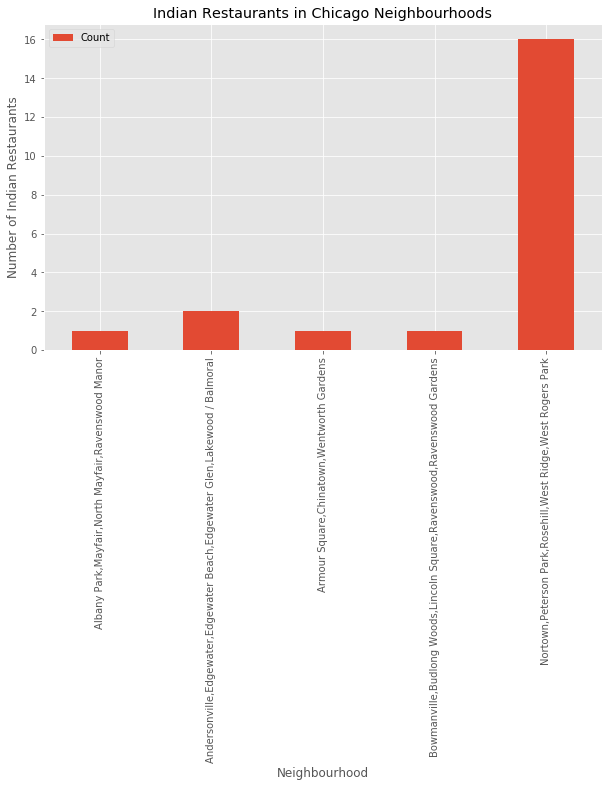

In [69]:
chicago_graph.plot(kind ='bar', figsize =(10,6))
plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Number of Indian Restaurants') # add y-label to the plot
plt.title('Indian Restaurants in Chicago Neighbourhoods') # add title to the plot

plt.show()

Use geocode to get latitude and longitude coordinates of Toronto city.

In [94]:
Address = 'Toronto, CA'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(Address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Lets visualize Toronto, CA on map

In [95]:

map_canada = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(canada_data['Latitude'], canada_data['Longitude'], canada_data['Borough'], canada_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [96]:
CLIENT_ID = '3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5'
CLIENT_SECRET = 'QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5
CLIENT_SECRET:QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H


Lets first explore the first neighbourhood

In [97]:
canada_data.loc[0, 'Neighbourhood']

'Rouge,Malvern'

Getting latitude and longitude coordinates of our first neighbourhood.

In [98]:
n_latitude = canada_data.loc[0, 'Latitude']
n_longitude = canada_data.loc[0, 'Longitude']

n_name = canada_data.loc[0, 'Neighbourhood']

print('Latitude and longitude values of {} are {}, {}.'.format(n_name, 
                                                               n_latitude, 
                                                               n_longitude))

Latitude and longitude values of Rouge,Malvern are 43.806686299999996, -79.19435340000001.


Creating url for Foursquare API call

In [99]:
LIMIT = 100
radius = 750
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
       CLIENT_ID, CLIENT_SECRET, VERSION, n_latitude, n_longitude, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?&client_id=3UWNFX0SRVQJMVVCJ3B2C5KOWK5FB1ETLMHFIIBN0BJX0PN5&client_secret=QW2CZDT4IFFE1ZZBMM1LCVDSUV40IOIDYBG3PUVHQU3HSY2H&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=750&limit=100'

Creating a json file using requests library

In [100]:
result_canada = requests.get(url1).json()
result_canada

{'meta': {'code': 200, 'requestId': '5cf5a8b5dd57970e23cb4daa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 43.81343630675, 'lng': -79.18501767109562},
   'sw': {'lat': 43.79993629324999, 'lng': -79.2036891289044}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d669cba83865481c948fa53',
       'name': 'Images Salon & Spa',
       'location': {'address': '8130 Sheppard Ave E',
        'crossStreet': 'Morningside Ave',
        'lat': 43.80228301948931,
        'lng': -79.19856472801668,
        'labeledLatLngs': [{'label

Creating a new dataframe *canada1_venues* with venue name,category,latitude and longitude values of first neighbourhood

In [101]:
canada1_venues = result_canada['response']['groups'][0]['items']
    
canada_nearby_venues = json_normalize(canada1_venues) # flatten JSON

# filter columns
canada_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
canada_nearby_venues = canada_nearby_venues.loc[:, canada_filtered_columns]

# filter the category for each row
canada_nearby_venues['venue.categories'] = canada_nearby_venues.apply(get_category_type, axis=1)

# clean columns
canada_nearby_venues.columns = [col.split(".")[-1] for col in canada_nearby_venues.columns]

canada_nearby_venues.head()

name                     categories        lat        lng
0   Images Salon & Spa                            Spa  43.802283 -79.198565
1  Staples Morningside  Paper / Office Supplies Store  43.800285 -79.196607
2              Wendy's           Fast Food Restaurant  43.807448 -79.199056
3              Wendy's           Fast Food Restaurant  43.802008 -79.198080
4          Tim Hortons                    Coffee Shop  43.802000 -79.198169

In [102]:
print('{} venues were returned by Foursquare.'.format(canada_nearby_venues.shape[0]))

7 venues were returned by Foursquare.


Now use the function _**getNearbyVenues**_ to get nearby venues for all location in canada_data.

In [103]:
canada_venues = getNearbyVenues(names=canada_data['Neighbourhood'],
                                   latitudes=canada_data['Latitude'],
                                   longitudes=canada_data['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
Nor

Check the size of resulting dataframe *canada_venues* using **shape** method

In [104]:
print(canada_venues.shape)
canada_venues.head()

(2256, 7)


Neighbourhood  Neighbourhood Latitude  \
0                         Rouge,Malvern               43.806686   
1  Highland Creek,Rouge Hill,Port Union               43.784535   
2  Highland Creek,Rouge Hill,Port Union               43.784535   
3       Guildwood,Morningside,West Hill               43.763573   
4       Guildwood,Morningside,West Hill               43.763573   

   Neighbourhood Longitude                            Venue  Venue Latitude  \
0               -79.194353                          Wendy's       43.807448   
1               -79.160497            Royal Canadian Legion       43.782533   
2               -79.160497   Scarborough Historical Society       43.788755   
3               -79.188711  Swiss Chalet Rotisserie & Grill       43.767697   
4               -79.188711                G & G Electronics       43.765309   

   Venue Longitude        Venue Category  
0       -79.199056  Fast Food Restaurant  
1       -79.163085                   Bar  
2       -79.162438        History Museum  
3       -79.189914           Pizza Place  
4       -79.191537     Electronics Store

Lets explore how many venues were returned for each neighbourhood

In [105]:
canada_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Adelaide,King,Richmond                                                 100   
Agincourt                                                                4   
Agincourt North,L'Amoreaux East,Milliken,Steele...                       3   
Albion Gardens,Beaumond Heights,Humbergate,Jame...                       9   
Alderwood,Long Branch                                                   10   
Bathurst Manor,Downsview North,Wilson Heights                           18   
Bayview Village                                                          4   
Bedford Park,Lawrence Manor East                                        22   
Berczy Park                                                             56   
Birch Cliff,Cliffside West                                               4   
Bloordale Gardens,Eringate,Markland Wood,Old Bu...                       8   
Brockton,Exhibition Place,Parkdale Village                              20   
Business Reply Mail Processing Centre 969 Eastern                       20   
CFB Toronto,Downsview East                                               4   
CN Tower,Bathurst Quay,Island airport,Harbourfr...                      14   
Cabbagetown,St. James Town                                              47   
Caledonia-Fairbanks                                                      6   
Canada Post Gateway Processing Centre                                   11   
Cedarbrae                                                                7   
Central Bay Street                                                      87   
Chinatown,Grange Park,Kensington Market                                100   
Christie                                                                16   
Church and Wellesley                                                    86   
Clairlea,Golden Mile,Oakridge                                            8   
Clarks Corners,Sullivan,Tam O'Shanter                                   10   
Cliffcrest,Cliffside,Scarborough Village West                            2   
Cloverdale,Islington,Martin Grove,Princess Gard...                       2   
Commerce Court,Victoria Hotel                                          100   
Davisville                                                              33   
Davisville North                                                        10   
Deer Park,Forest Hill SE,Rathnelly,South Hill,S...                      14   
Del Ray,Keelesdale,Mount Dennis,Silverthorn                              4   
Design Exchange,Toronto Dominion Centre                                100   
Don Mills North                                                          5   
Dorset Park,Scarborough Town Centre,Wexford Hei...                       7   
Dovercourt Village,Dufferin                                             22   
Downsview Central                                                        4   
Downsview Northwest                                                      5   
Downsview West                                                           5   
Downsview,North Park,Upwood Park                                         4   
East Birchmount Park,Ionview,Kennedy Park                                7   
East Toronto                                                             4   
Emery,Humberlea                                                          1   
Fairview,Henry Farm,Oriole                                              64   
First Canadian Place,Underground city                                  100   
Flemingdon Park,Don Mills South                                         22   
Forest Hill North,Forest Hill West                                       4   
Glencairn                                                                4   
Guildwood,Morningside,West Hill                                          8   
Harbord,University of Toronto                                           36

Canada dataframe's one hot encoding

In [106]:
# one hot encoding
canada_onehot = pd.get_dummies(canada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Neighbourhood'] = canada_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]

canada_onehot.head()

Neighbourhood  Accessories Store  Adult Boutique  \
0                         Rouge,Malvern                  0               0   
1  Highland Creek,Rouge Hill,Port Union                  0               0   
2  Highland Creek,Rouge Hill,Port Union                  0               0   
3       Guildwood,Morningside,West Hill                  0               0   
4       Guildwood,Morningside,West Hill                  0               0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                  0        0                   0               0   
1                  0        0                   0               0   
2                  0        0                   0               0   
3                  0        0                   0               0   
4                  0        0                   0               0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0                0                 0                    0             0   
1                0                 0                    0             0   
2                0                 0                    0             0   
3                0                 0                    0             0   
4                0                 0                    0             0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0         0            0           0                    0                 0   
1         0            0           0                    0                 0   
2         0            0           0                    0                 0   
3         0            0           0                    0                 0   
4         0            0           0                    0                 0   

   Astrologer  Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  \
0           0                   0            0              0          0   
1           0                   0            0              0          0   
2           0                   0            0              0          0   
3           0                   0            0              0          0   
4           0                   0            0              0          0   

   Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0           0           0       0     0    0               0   
1           0           0       0     0    1               0   
2           0           0       0     0    0               0   
3           0           0       0     0    0               0   
4           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
0                 0                 0                   0      0   
1                 0                 0                   0      0   
2                 0                 0                   0      0   
3                 0                 0                   0      0   
4                 0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Burger Joint  \
0            

In [107]:
canada_onehot.shape

(2256, 280)

Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [108]:
canada_grouped = canada_onehot.groupby('Neighbourhood').mean().reset_index()
canada_grouped

Neighbourhood  Accessories Store  \
0                              Adelaide,King,Richmond           0.000000   
1                                           Agincourt           0.000000   
2   Agincourt North,L'Amoreaux East,Milliken,Steel...           0.000000   
3   Albion Gardens,Beaumond Heights,Humbergate,Jam...           0.000000   
4                               Alderwood,Long Branch           0.000000   
5       Bathurst Manor,Downsview North,Wilson Heights           0.000000   
6                                     Bayview Village           0.000000   
7                    Bedford Park,Lawrence Manor East           0.000000   
8                                         Berczy Park           0.000000   
9                          Birch Cliff,Cliffside West           0.000000   
10  Bloordale Gardens,Eringate,Markland Wood,Old B...           0.000000   
11         Brockton,Exhibition Place,Parkdale Village           0.000000   
12  Business Reply Mail Processing Centre 969 Eastern           0.000000   
13                         CFB Toronto,Downsview East           0.000000   
14  CN Tower,Bathurst Quay,Island airport,Harbourf...           0.000000   
15                         Cabbagetown,St. James Town           0.000000   
16                                Caledonia-Fairbanks           0.000000   
17              Canada Post Gateway Processing Centre           0.000000   
18                                          Cedarbrae           0.000000   
19                                 Central Bay Street           0.000000   
20            Chinatown,Grange Park,Kensington Market           0.000000   
21                                           Christie           0.000000   
22                               Church and Wellesley           0.000000   
23                      Clairlea,Golden Mile,Oakridge           0.000000   
24              Clarks Corners,Sullivan,Tam O'Shanter           0.000000   
25      Cliffcrest,Cliffside,Scarborough Village West           0.000000   
26  Cloverdale,Islington,Martin Grove,Princess Gar...           0.000000   
27                      Commerce Court,Victoria Hotel           0.000000   
28                                         Davisville           0.000000   
29                                   Davisville North           0.000000   
30  Deer Park,Forest Hill SE,Rathnelly,South Hill,...           0.000000   
31        Del Ray,Keelesdale,Mount Dennis,Silverthorn           0.000000   
32            Design Exchange,Toronto Dominion Centre           0.000000   
33                                    Don Mills North           0.000000   
34  Dorset Park,Scarborough Town Centre,Wexford He...           0.000000   
35                        Dovercourt Village,Dufferin           0.000000   
36                                  Downsview Central           0.000000   
37                                Downsview Northwest           0.000000   
38                                     Downsview West           0.000000   
39                   Downsview,North Park,Upwood Park           0.000000   
40          East Birchmount Park,Ionview,Kennedy Park           0.000000   
41                                       East Toronto           0.000000   
42                                    Emery,Humberlea           0.000000   
43                         Fairview,Henry Farm,Oriole           0.000000   
44              First Canadian Place,Underground city           0.000000   
45                    Flemingdon Park,Don Mills South           0.000000   
46                 Forest Hill North,Forest Hill West           0.000000   
47                                          Glencairn           0.000000   
48                    Guildwood,Morningside,West Hill           0.000000   
49                      Harbord,University of Toronto           0.000000   
50    Harbourfront East,Toronto Islands,Union Station           0.000000   
51                           Harbourfront,Regent Park           0.000000   
52          

In [109]:
canada_grouped.shape

(98, 280)

Let's print each neighborhood along with the top 5 most common venues

In [110]:
num_top_venues = 5

for hood in canada_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = canada_grouped[canada_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2           Steakhouse  0.04
3  American Restaurant  0.04
4                  Bar  0.04


----Agincourt----
            venue  freq
0  Clothing Store  0.25
1    Skating Rink  0.25
2  Breakfast Spot  0.25
3          Lounge  0.25
4   Movie Theater  0.00


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
               venue  freq
0         Playground  0.33
1               Park  0.33
2        Coffee Shop  0.33
3  Accessories Store  0.00
4  Mobile Phone Shop  0.00


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                  venue  freq
0         Grocery Store  0.22
1           Pizza Place  0.11
2           Coffee Shop  0.11
3        Sandwich Place  0.11
4  Fast Food Restaurant  0.11


----Alderwood,Long Branch----
          venue  freq
0   Pizza Place   0.2
1  Skating Rink   0.1
2           Pu

Now let's create the new dataframe and display the top 10 venues for each neighbourhood using **return_most_common_venues** function.

In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
canada_neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
canada_neighbourhoods_venues_sorted['Neighbourhood'] = canada_grouped['Neighbourhood']

for ind in np.arange(canada_grouped.shape[0]):
    canada_neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(canada_grouped.iloc[ind, :], num_top_venues)

canada_neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue  \
0                             Adelaide,King,Richmond           Coffee Shop   
1                                          Agincourt                Lounge   
2  Agincourt North,L'Amoreaux East,Milliken,Steel...                  Park   
3  Albion Gardens,Beaumond Heights,Humbergate,Jam...         Grocery Store   
4                              Alderwood,Long Branch           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café       Thai Restaurant                   Bar   
1        Breakfast Spot        Clothing Store          Skating Rink   
2            Playground           Coffee Shop           Yoga Studio   
3  Fast Food Restaurant           Pizza Place        Sandwich Place   
4           Coffee Shop              Pharmacy        Sandwich Place   

  5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
0            Steakhouse          American Restaurant                 Hotel   
1           Yoga Studio  Eastern European Restaurant               Dog Run   
2             Drugstore                        Diner        Discount Store   
3            Beer Store                  Coffee Shop   Fried Chicken Joint   
4                   Pub                         Pool          Dance Studio   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Bakery        Cosmetics Shop           Burger Joint  
1      Doner Restaurant            Donut Shop              Drugstore  
2              Dive Bar               Dog Run       Doner Restaurant  
3              Pharmacy     Electronics Store    Empanada Restaurant  
4          Skating Rink                   Gym              Drugstore

Run k-means to cluster the neighbourhood into 8 clusters.

In [112]:
# set number of clusters
kclusters = 8

canada_grouped_clustering = canada_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(canada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 5, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Adding *Cluster Labels* column and merging two dataframes.

In [113]:
# add clustering labels
canada_neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

canada_merged = canada_data

# merge toronto_grouped with toronto_df to add latitude/longitude for each neighborhood
canada_merged = canada_merged.join(canada_neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

canada_merged.head() # check the last columns!

Postcode      Borough                         Neighbourhood   Latitude  \
0      M1B  Scarborough                         Rouge,Malvern  43.806686   
1      M1C  Scarborough  Highland Creek,Rouge Hill,Port Union  43.784535   
2      M1E  Scarborough       Guildwood,Morningside,West Hill  43.763573   
3      M1G  Scarborough                                Woburn  43.770992   
4      M1H  Scarborough                             Cedarbrae  43.773136   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.194353               6  Fast Food Restaurant   Dumpling Restaurant   
1 -79.160497               0        History Museum                   Bar   
2 -79.188711               0                   Spa   Rental Car Location   
3 -79.216917               0           Coffee Shop     Korean Restaurant   
4 -79.239476               0                Bakery      Hakka Restaurant   

  3rd Most Common Venue        4th Most Common Venue 5th Most Common Venue  \
0        Discount Store                     Dive Bar               Dog Run   
1           Yoga Studio  Eastern European Restaurant               Dog Run   
2     Electronics Store                  Pizza Place        Breakfast Spot   
3           Yoga Studio                     Dive Bar               Dog Run   
4    Athletics & Sports         Caribbean Restaurant       Thai Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Doner Restaurant            Donut Shop             Drugstore   
1      Doner Restaurant            Donut Shop             Drugstore   
2        Medical Center          Intersection    Mexican Restaurant   
3      Doner Restaurant            Donut Shop             Drugstore   
4                  Bank   Fried Chicken Joint           Yoga Studio   

         9th Most Common Venue       10th Most Common Venue  
0  Eastern European Restaurant                        Field  
1          Dumpling Restaurant            Electronics Store  
2                  Yoga Studio             Doner Restaurant  
3          Dumpling Restaurant  Eastern European Restaurant  
4                    Drugstore             Doner Restaurant

In [114]:
canada_merged

Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
30       M3K        North York   
31       M3L        North York   
32       M3M        North York   
33       M3N        North York   
34       M4A        North York   
35       M4B         East York   
36       M4C         East York   
37       M4E      East Toronto   
38       M4G         East York   
39       M4H         East York   
40       M4J         East York   
41       M4K      East Toronto   
42       M4L      East Toronto   
43       M4M      East Toronto   
44       M4N   Central Toronto   
45       M4P   Central Toronto   
46       M4R   Central Toronto   
47       M4S   Central Toronto   
48       M4T   Central Toronto   
49       M4V   Central Toronto   
50       M4W  Downtown Toronto   
51       M4X  Downtown Toronto   
52       M4Y  Downtown Toronto   
53       M5A  Downtown Toronto   
54       M5B  Downtown Toronto   
55       M5C  Downtown Toronto   
56       M5E  Downtown Toronto   
57       M5G  Downtown Toronto   
58       M5H  Downtown Toronto   
59       M5J  Downtown Toronto   
60       M5K  Downtown Toronto   
61       M5L  Downtown Toronto   
62       M5M        North York   
63       M5N   Central Toronto   
64       M5P   Central Toronto   
65       M5R   Central Toronto   
66       M5S  Downtown Toronto   
67       M5T  Downtown Toronto   
68       M5V  Downtown Toronto   
69       M5W  Downtown Toronto   
70       M5X  Downtown Toronto   
71       M6A        North York   
72       M6B        North York   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  \
0                                        Rouge,Malvern  43.806686 -79.194353   
1                 Highland Creek,Rouge Hill,Port Union  43.784535 -79.160497   
2                      Guildwood,Morningside,West Hill  43.763573 -79.188711   
3                                               Woburn  43.770992 -79.216917   
4                                            Cedarbrae  43.773136 -79.239476   
5                                  Scarborough Village  43.744734 -79.239476   
6            East Birchmount Park,Ionview,Kennedy Park  43.727929 -79.262029 

Lets visualize clusters on map

In [115]:
# create map
map_canada_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Neighbourhood'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_canada_clusters)
       
map_canada_clusters

Cluster 0

In [116]:
canada_merged.loc[canada_merged['Cluster Labels'] == 0, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
1         Scarborough               0        History Museum   
2         Scarborough               0                   Spa   
3         Scarborough               0           Coffee Shop   
4         Scarborough               0                Bakery   
6         Scarborough               0        Discount Store   
7         Scarborough               0                Bakery   
8         Scarborough               0   American Restaurant   
9         Scarborough               0       College Stadium   
10        Scarborough               0     Indian Restaurant   
11        Scarborough               0           Auto Garage   
12        Scarborough               0                Lounge   
13        Scarborough               0           Pizza Place   
15        Scarborough               0    Chinese Restaurant   
17         North York               0                  Pool   
18         North York               0        Clothing Store   
19         North York               0                  Café   
22         North York               0      Ramen Restaurant   
24         North York               0               Butcher   
26         North York               0   Japanese Restaurant   
27         North York               0                   Gym   
28         North York               0           Coffee Shop   
29         North York               0         Metro Station   
31         North York               0                  Park   
32         North York               0            Food Truck   
33         North York               0        Discount Store   
34         North York               0          Intersection   
35          East York               0  Fast Food Restaurant   
36          East York               0                  Park   
37       East Toronto               0     Health Food Store   
38          East York               0   Sporting Goods Shop   
39          East York               0     Indian Restaurant   
41       East Toronto               0      Greek Restaurant   
42       East Toronto               0                  Park   
43       East Toronto               0                  Café   
45    Central Toronto               0                  Park   
46    Central Toronto               0        Clothing Store   
47    Central Toronto               0          Dessert Shop   
49    Central Toronto               0           Coffee Shop   
51   Downtown Toronto               0           Coffee Shop   
52   Downtown Toronto               0           Coffee Shop   
53   Downtown Toronto               0           Coffee Shop   
54   Downtown Toronto               0           Coffee Shop   
55   Downtown Toronto               0           Coffee Shop   
56   Downtown Toronto               0           Coffee Shop   
57   Downtown Toronto               0           Coffee Shop   
58   Downtown Toronto               0           Coffee Shop   
59   Downtown Toronto               0           Coffee Shop   
60   Downtown Toronto               0           Coffee Shop   
61   Downtown Toronto               0           Coffee Shop   
62         North York               0           Coffee Shop   
63    Central Toronto               0          Home Service   
65    Central Toronto               0        Sandwich Place   
66   Downtown Toronto               0                  Café   
67   Downtown Toronto               0                  Café   
68   Downtown Toronto               0       Airport Service   
69   Downtown Toronto               0           Coffee Shop   
70   Downtown Toronto               0                  Café   
71         North York               0        Clothing Store   
75   Downtown Toronto               0         Grocery Store   
76       West Toronto               0                Bakery   
77       West Toronto               0                   Bar   
78       West Toronto               0        Breakfast Spot   
80               York               0        

Cluster 1

In [117]:
canada_merged.loc[canada_merged['Cluster Labels'] == 1, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
44   Central Toronto               1                  Park   
100        Etobicoke               1                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
44            Swim School              Bus Line           Yoga Studio   
100           Pizza Place     Mobile Phone Shop              Bus Line   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
44              Drugstore              Dive Bar               Dog Run   
100            Donut Shop        Discount Store              Dive Bar   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
44       Doner Restaurant            Donut Shop    Dumpling Restaurant  
100               Dog Run      Doner Restaurant              Drugstore

Cluster 2

In [118]:
canada_merged.loc[canada_merged['Cluster Labels'] == 2, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
97  North York               2        Baseball Field           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
97              Dive Bar               Dog Run      Doner Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
97            Donut Shop             Drugstore   Dumpling Restaurant   

          9th Most Common Venue 10th Most Common Venue  
97  Eastern European Restaurant                  Diner

Cluster 3

In [119]:
canada_merged.loc[canada_merged['Cluster Labels'] == 3, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
5       Scarborough               3                   Spa   
48  Central Toronto               3           Summer Camp   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5             Playground             Drugstore                 Diner   
48            Playground           Yoga Studio        Discount Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5         Discount Store              Dive Bar               Dog Run   
48              Dive Bar               Dog Run      Doner Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
5       Doner Restaurant            Donut Shop    Dumpling Restaurant  
48            Donut Shop             Drugstore    Dumpling Restaurant

Cluster 4

In [120]:
canada_merged.loc[canada_merged['Cluster Labels'] == 4, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
102  Etobicoke               4   Rental Car Location             Drugstore   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
102           Yoga Studio    Dim Sum Restaurant        Discount Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
102              Dive Bar               Dog Run      Doner Restaurant   

    9th Most Common Venue 10th Most Common Venue  
102            Donut Shop    Dumpling Restaurant

Cluster 5

In [121]:
canada_merged.loc[canada_merged['Cluster Labels'] == 5, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
14       Scarborough               5                  Park   
23        North York               5                  Park   
25        North York               5  Fast Food Restaurant   
30        North York               5                  Park   
40         East York               5                  Park   
50  Downtown Toronto               5                  Park   
64   Central Toronto               5                  Park   
72        North York               5                  Park   
73              York               5                 Field   
74              York               5                  Park   
79        North York               5                  Park   
90         Etobicoke               5                  Park   

         2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
14                  Playground           Coffee Shop              Yoga Studio   
23           Convenience Store                  Bank              Yoga Studio   
25                        Park     Food & Drink Shop      Dumpling Restaurant   
30           Other Repair Shop               Airport              Snack Place   
40                 Coffee Shop     Convenience Store              Yoga Studio   
50                  Playground                 Trail                Drugstore   
64            Sushi Restaurant         Jewelry Store                    Trail   
72                 Pizza Place   Japanese Restaurant                      Pub   
73                       Trail                  Park             Hockey Arena   
74        Fast Food Restaurant              Pharmacy                   Market   
79  Construction & Landscaping                Bakery         Basketball Court   
90                  Smoke Shop                 River  Comfort Food Restaurant   

          5th Most Common Venue        6th Most Common Venue  \
14                    Drugstore                        Diner   
23  Eastern European Restaurant                      Dog Run   
25               Discount Store                     Dive Bar   
30          Dumpling Restaurant               Discount Store   
40  Eastern European Restaurant                     Dive Bar   
50                        Diner               Discount Store   
64                   Donut Shop               Discount Store   
72                   Donut Shop                        Diner   
73               Discount Store                     Dive Bar   
74                Women's Store      Comfort Food Restaurant   
79                  Yoga Studio  Eastern European Restaurant   
90                   Comic Shop                  Event Space   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14        Discount Store              Dive Bar               Dog Run   
23      Doner Restaurant            Donut Shop             Drugstore   
25               Dog Run      Doner Restaurant            Donut Shop   
30              Dive Bar               Dog Run      Doner Restaurant   
40               Dog Run      Doner Restaurant            Donut Shop   
50              Dive Bar               Dog Run      Doner Restaurant   
64              Dive Bar               Dog Run      Doner Restaurant   
72        Discount Store              Dive Bar               Dog Run   
73               Dog Run      Doner Restaurant            Donut Shop   
74    Falafel Restaurant           Event Space  Ethiopian Restaurant   
79               Dog Run      Doner Restaurant            Donut Shop   
90  Ethiopian Restaurant   Empanada Restaurant  Colombian Restaurant   

   10th Most Common Venue  
14       Doner Restaurant  
23    Dumpling Restaurant  
25              Drugstore  
30             Donut Shop  
40              Drugstore  
50             Donut Shop  
64              Drugstore  
72       Doner Restaurant  
73              Drugstore  
74    Empanada Restaurant  
79              Drugstore  
90      Electronics Store

Cluster 6

In [122]:
canada_merged.loc[canada_merged['Cluster Labels'] == 6, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  Scarborough               6  Fast Food Restaurant   Dumpling Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Discount Store              Dive Bar               Dog Run   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Doner Restaurant            Donut Shop             Drugstore   

         9th Most Common Venue 10th Most Common Venue  
0  Eastern European Restaurant                  Field

Cluster 7

In [123]:
canada_merged.loc[canada_merged['Cluster Labels'] == 7, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
96  North York               7           Pizza Place   Empanada Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
96           Yoga Studio   Dumpling Restaurant        Discount Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
96              Dive Bar               Dog Run      Doner Restaurant   

   9th Most Common Venue 10th Most Common Venue  
96            Donut Shop              Drugstore

In [124]:
canada_indian = canada_venues[canada_venues['Venue Category'] == 'Indian Restaurant']
canada_indian

Neighbourhood  \
44    Dorset Park,Scarborough Town Centre,Wexford He...   
47    Dorset Park,Scarborough Town Centre,Wexford He...   
346                                    Thorncliffe Park   
349                                    Thorncliffe Park   
392                         The Danforth West,Riverdale   
504                                          Davisville   
555                          Cabbagetown,St. James Town   
645                                Church and Wellesley   
892                                      St. James Town   
1059                                 Central Bay Street   
1064                                 Central Bay Street   
1150                             Adelaide,King,Richmond   
1229    Harbourfront East,Toronto Islands,Union Station   
1485                   Bedford Park,Lawrence Manor East   
1507                  The Annex,North Midtown,Yorkville   

      Neighbourhood Latitude  Neighbourhood Longitude  \
44                 43.757410               -79.273304   
47                 43.757410               -79.273304   
346                43.705369               -79.349372   
349                43.705369               -79.349372   
392                43.679557               -79.352188   
504                43.704324               -79.388790   
555                43.667967               -79.367675   
645                43.665860               -79.383160   
892                43.651494               -79.375418   
1059               43.657952               -79.387383   
1064               43.657952               -79.387383   
1150               43.650571               -79.384568   
1229               43.640816               -79.381752   
1485               43.733283               -79.419750   
1507               43.672710               -79.405678   

                                            Venue  Venue Latitude  \
44                                        Kairali       43.754768   
47    Karaikudi Chettinad South Indian Restaurant       43.756042   
346                    Iqbal Kebab & Sweet Centre       43.705923   
349                                  Hakka Garden       43.704578   
392                                 Sher-E-Punjab       43.677308   
504                        Marigold Indian Bistro       43.702881   
555                        Butter Chicken Factory       43.667072   
645                         Kothur Indian Cuisine       43.667872   
892                                 Bombay Palace       43.651174   
1059                           Bombay Street Food       43.661904   
1064                              Colaba Junction       43.660940   
1150                      Little India Restaurant       43.650319   
1229                            Indian Roti House       43.639060   
1485                           The Copper Chimney       43.736195   
1507                        Roti Cuisine of India       43.674618   

      Venue Longitude     Venue Category  
44         -79.277199  Indian Restaurant  
47         -79.276276  Indian Restaurant  
346        -79.351521  Indian Restaurant  
349        -79.349770  Indian Restaurant  
392        -79.353066  Indian Restaurant  
504        -79.388008  Indian Restaurant  
555        -79.369184  Indian Restaurant  
645        -79.385659  Indian Restaurant  
892        -79.372140  Indian Restaurant  
1059       -79.386145  Indian Restaurant  
1064       -79.385635  Indian Restaurant  
1150       -79.388998  Indian Restaurant  
1229       -79.385422  Indian Restaurant  
1485       -79.420271  Indian Restaurant  
1507       -79.408249  Indian Restaurant

Lets visualize clusters on Toronto map.

In [125]:
map_canada_indian = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(canada_indian['Neighbourhood Latitude'], canada_indian['Neighbourhood Longitude'], canada_indian['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_canada_indian)  
    
map_canada_indian

Create a new dataframe with count of Indian restaurant in each neighbourhood.

In [126]:
canada_graph = canada_indian.groupby(['Neighbourhood'], axis = 0).count()
canada_graph.drop(['Neighbourhood Latitude','Neighbourhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis =1, inplace =True)
canada_graph.rename(columns={'Venue':'Count'}, inplace =True)
canada_graph

Count
Neighbourhood                                            
Adelaide,King,Richmond                                  1
Bedford Park,Lawrence Manor East                        1
Cabbagetown,St. James Town                              1
Central Bay Street                                      2
Church and Wellesley                                    1
Davisville                                              1
Dorset Park,Scarborough Town Centre,Wexford Hei...      2
Harbourfront East,Toronto Islands,Union Station         1
St. James Town                                          1
The Annex,North Midtown,Yorkville                       1
The Danforth West,Riverdale                             1
Thorncliffe Park                                        2

In [127]:
canada_graph_borough = canada_graph.merge(canada_data, on = 'Neighbourhood')
canada_graph_borough.drop(['Postcode','Latitude','Longitude'], axis = 1, inplace =True)
canada_graph_borough

Neighbourhood  Count           Borough
0                              Adelaide,King,Richmond      1  Downtown Toronto
1                    Bedford Park,Lawrence Manor East      1        North York
2                          Cabbagetown,St. James Town      1  Downtown Toronto
3                                  Central Bay Street      2  Downtown Toronto
4                                Church and Wellesley      1  Downtown Toronto
5                                          Davisville      1   Central Toronto
6   Dorset Park,Scarborough Town Centre,Wexford He...      2       Scarborough
7     Harbourfront East,Toronto Islands,Union Station      1  Downtown Toronto
8                                      St. James Town      1  Downtown Toronto
9                   The Annex,North Midtown,Yorkville      1   Central Toronto
10                        The Danforth West,Riverdale      1      East Toronto
11                                   Thorncliffe Park      2         East York

Create a bar chart with neighbourhood on x-axis and count of Indian restaurant on y-axis.

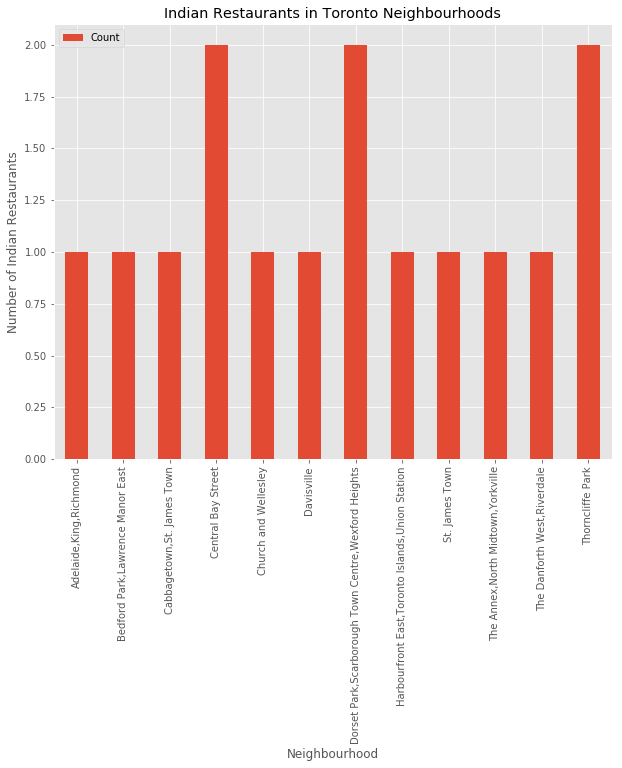

In [128]:
canada_graph.plot(kind ='bar', figsize =(10,8))
plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Number of Indian Restaurants') # add y-label to the plot
plt.title('Indian Restaurants in Toronto Neighbourhoods') # add title to the plot

plt.show()